# Logistic Regression

The sigmoid function and a region of ambiguity.



In [ ]:
# Re-import necessary libraries due to environment reset
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Create a grid of values for x1 and x2
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Define a linear combination (a "linear front") for X1 and X2
# Using arbitrary coefficients to create a linear front
Z = 3 * X1 + 2 * X2

# Apply the sigmoid function to the linear front
Y = sigmoid(Z)

# Plotting the 3D Sigmoid Function
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Y, cmap='viridis', edgecolor='none')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Sigmoid Output')
ax.set_title('3D Sigmoid Function along a Linear Front $3x_1 + 2x_2$')
plt.show()

<IPython.core.display.Javascript object>

In [5]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=X1, y=X2, z=Y)])
fig.show()

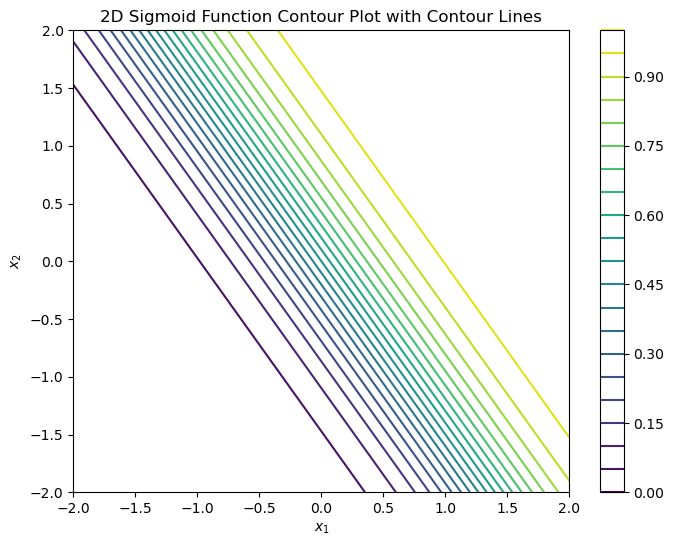

In [3]:
# Plot the 2D sigmoid function using contour lines instead of filled contours
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Y, levels=20, cmap="viridis")
plt.colorbar(contour)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2D Sigmoid Function Contour Plot with Contour Lines')
plt.show()

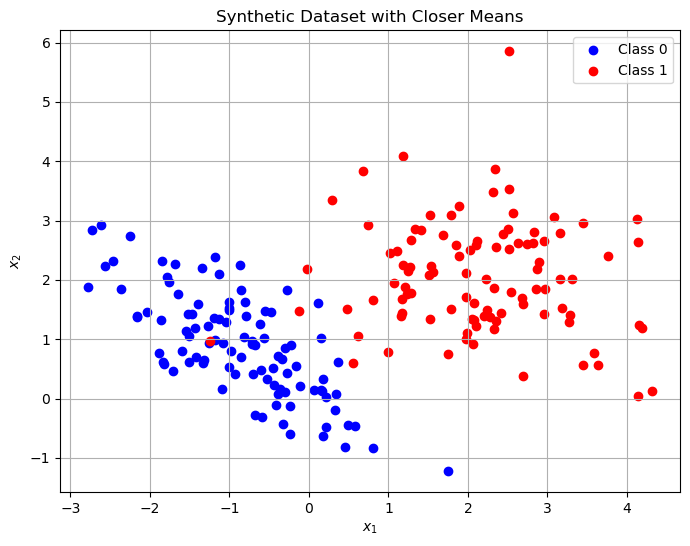

In [8]:
# generate some data.

# Set random seed for reproducibility
np.random.seed(42)

# Adjust the means to be closer together
mean_0 = [-1, 1]
cov_0 = [[1, -0.8],
         [-0.8, 1]]
mean_1 = [2, 2]
cov_1 = [[1, 0],
         [0, 1]]

# Generate synthetic data for class 0 (centered near the negative quadrant)
class_0 = np.random.multivariate_normal(mean_0, cov_0, 100)
#class_0 = class_0[(class_0[:, 0] < 0)]  # Clip to negative x.

# Generate synthetic data for class 1 (centered near the positive quadrant)
class_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
#class_1 = class_1[(class_1[:, 0] > 0)]  # Clip to positive x.

# Combine data and labels
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(len(class_0)), np.ones(len(class_1))))

# Plot the adjusted data points for visualization
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color="blue", label="Class 0")
plt.scatter(class_1[:, 0], class_1[:, 1], color="red", label="Class 1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Synthetic Dataset with Closer Means")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np

# SGD = Stochastic Gradient Descent
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None  # Parameter vector including weights and bias
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        # Initialize theta (weights + bias as the first element)
        self.theta = np.random.randn(n_features + 1)

    def update(self, x, y):
        # Add a bias term (x_0 = 1) for each x sample
        x_with_bias = np.insert(x, 0, 1)
        
        # Compute prediction (hypothesis)
        z = np.dot(self.theta, x_with_bias)
        y_predicted = self.sigmoid(z)
        
        # Compute the gradient for each theta_j
        gradient = (y_predicted - y) * x_with_bias
        
        # Update parameters (theta) using SGD
        self.theta -= self.learning_rate * gradient

        # Return current theta (weights and bias)
        return self.theta
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        for epoch in range(self.epochs):
            for i in range(n_samples):
                self.update(X[i], y[i])
    
    def predict(self, X):
        # Add bias term to each sample
        X_with_bias = np.insert(X, 0, 1, axis=1)
        z = np.dot(X_with_bias, self.theta)
        y_predicted = self.sigmoid(z)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [114]:
import matplotlib.transforms as transforms


def plot_decision_boundary(X, y, theta, step, sample_index=None):
    """
    Plot the decision boundary with a thick line, highlight the sample used for updating,
    and visualize vectors representing feature and surface normal with a bias offset.

    Parameters:
    - X: Features matrix (numpy array)
    - y: Labels (numpy array)
    - theta: parameters for the logistic regression model
    - step: Current step number in the training process
    - sample_index: Index of the sample being used for the current update (optional)
    """
    # if step == 0:
    #     plt.ion()  # Enable interactive mode
    #     fig, ax = plt.subplots(figsize=(8, 6))
    # else:
    #     ax = plt.gca()
    fig, ax = plt.subplots(figsize=(8, 6))
    
    #ax.cla()  # Clear previous plot contents to update in the same window

    # Ensure equal aspect ratio
    ax.set_aspect('equal', adjustable='box')

    # Define grid for contour plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    # I want the axes to have the same scale so let's take the larger of the two
    # and use it both directions, and that the contours and meshgrid span 
    # entire plot.
    dimension = max(x_max - x_min, y_max - y_min) + 2
    mid_x = (x_max + x_min) / 2
    x_min = mid_x - dimension / 2
    x_max = mid_x + dimension / 2
    mid_y = (y_max + y_min) / 2
    y_min = mid_y - dimension / 2 
    y_max = mid_y + dimension / 2
    ax.set_xlim(x_min, x_max)  # Set x-axis bounds
    ax.set_ylim(y_min, y_max)  # Set y-axis bounds

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Calculate decision boundary values using sigmoid function
    Z = theta[0] + theta[1] * xx + theta[2] * yy 
    Z = 1 / (1 + np.exp(-Z))  # Apply sigmoid function for decision boundary

    # Plot contour for decision boundary probability levels
    contour = ax.contourf(xx, yy, Z, levels=20, cmap="viridis", alpha=0.6)
    fig.colorbar(contour)

    # Scatter plot for data points
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 0")
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 1")

    ###
    # Define the decision boundary line
    decision_boundary_x = np.linspace(x_min, x_max, 200)
    decision_boundary_y = -(theta[1] * decision_boundary_x + theta[0]) / theta[2]
    ax.plot(decision_boundary_x, decision_boundary_y, 'k-', linewidth=2.5, label="Decision Boundary")

    # Plot surface normal vector from the origin (weights give the direction)
    ax.quiver(0, 0, theta[1], theta[2], angles='xy', scale_units='xy', scale=1, 
              color="black", alpha=0.7, label="Surface Normal (origin)")

    print(f"theta: {theta}")
    
    # Calculate offset position along x_1 or x_2 to represent bias
    offset_position = np.array([0., 0.])
    if theta[0] != 0:
        offset_position[0] = -theta[0] / theta[1]
        offset_label = f"$-\Theta_0 / \Theta_1$ = {-theta[0] / theta[1]:.3f}"

    elif theta[1] != 0:
        offset_position[1] = -theta[0] / theta[2]
        offset_label = f"$-\Theta_0 / \Theta_2$ = { -theta[0] / theta[2]:.3f}"

    # dotted line showing the shift
    #ax.quiver(0, 0, offset_position[0], offset_position[1],
    #           angles='xy', scale_units='xy', scale=1, color="gray", linestyle=":", label="bias")

    print(f"offset_position: {offset_position}")
    
    # Plot shifted surface normal vector at decision boundary level
    ax.quiver(offset_position[0], offset_position[1], theta[1], theta[2], angles='xy', scale_units='xy', scale=1,
              color="black", alpha=0.7, label="Surface Normal (biased)")

    plt.annotate(
        '', xy=(offset_position[0], offset_position[1]), xytext=(0, 0),
        arrowprops=dict(arrowstyle='<->', color='white', linewidth=3)
    )

    mid = offset_position / 2
           
    # Define fixed position for the label in axis-relative coordinates (e.g., bottom-right corner)
    text_x, text_y = 0.8, 0.1  # Adjust as needed for placement within the axis
    
    # Add text at the fixed position
    text_label = ax.text(
        text_x, text_y, offset_label, ha='center', va='top', 
        color='white', transform=ax.transAxes
    )

    # Convert the fixed text position in axis-relative coordinates to data coordinates
    display_coord = ax.transAxes.transform((text_x, text_y))  # Convert to display coordinates
    data_coord = ax.transData.inverted().transform(display_coord)  # Convert display to data coordinates

    # Draw a line (arrow) from the midpoint in data coordinates to the calculated text position in data coordinates
    ax.annotate(
        '', xy=(data_coord[0], data_coord[1]), xytext=(mid[0], mid[1]),
        arrowprops=dict(arrowstyle='-', color='white', linestyle='--', linewidth=2)
    )

    # Highlight the current sample used for update, if provided
    if sample_index is not None:
        x_sample = X[sample_index]
        ax.scatter(x_sample[0], x_sample[1], color="yellow", edgecolor="black", s=100, label="Update Sample")
        
        # Plot vector from origin to the sample point
        ax.quiver(0, 0, x_sample[0], x_sample[1], angles='xy', scale_units='xy', 
                  scale=1, color="white", edgecolor="black")
        
        # Plot shifted vector to sample point at decision boundary level
        ax.quiver(offset_position[0], offset_position[1], 
                  x_sample[0], x_sample[1], 
                  angles='xy', scale_units='xy', 
                  scale=1, color="white", edgecolor="black")

    # Labels and legend
    ax.set_title(f"Decision Boundary Update - Step {step}")
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend()
    ax.grid(True)

    plt.show()
    
    # Draw the updated plot
    # plt.draw()
    # plt.pause(0.1)  # Pause to update plot

    # input("Press Enter to continue to the next update...")  # Wait for key press   
    

theta: [5, 1, -1]
offset_position: [-5.  0.]


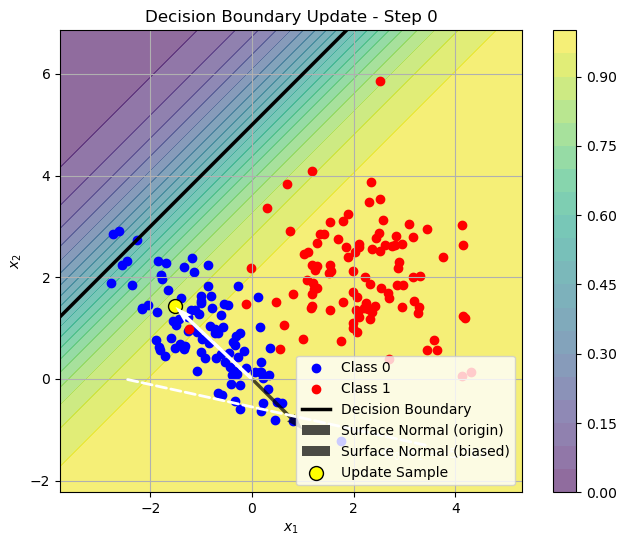

model.theta=[5, 1, -1]
x_with_bias=[ 1.         -1.51494743  1.42750141]
z=2.0575511582658725
y_predicted - y = 0.8867084004449652 - 0.0 = 0.8867084004449652
gradient=[ 0.8867084  -1.34331661  1.26577749]
thetanew = theta - alpha * gradient = [5, 1, -1] - 0.4 * [ 0.8867084  -1.34331661  1.26577749] = [ 4.64531664  1.53732665 -1.506311  ]


In [136]:
    # Initialize the logistic regression model
np.random.seed(83)  #97   # 91
learning_rate = 0.4
step = 0
model = LogisticRegressionSGD(learning_rate=learning_rate)

               
# X is the "design matrix" where each row is a data point and 
# the columns are features.
model.initialize_parameters(X.shape[1])  # X.shape[0] is num rows. X.shape[1] = num columns
model.theta = [5, 1, -1]
plot_decision_boundary(X, y, model.theta, step = step, sample_index=0)

print(f"model.theta={model.theta}")
x_with_bias = np.insert(X[0], 0, 1)
print(f"x_with_bias={x_with_bias}")
theta = model.theta
z = np.dot(theta, x_with_bias)
print(f"z={z}")
y_predicted = model.sigmoid(z)
print(f"y_predicted - y = {y_predicted} - {y[0]} = {y_predicted - y[0]}")     
gradient = (y_predicted - y[0]) * x_with_bias
print(f"gradient={gradient}")
thetanew = theta - model.learning_rate * gradient
print(f"thetanew = theta - alpha * gradient = {theta} - {model.learning_rate} * {gradient} = {thetanew}")


theta: [ 4.64531664  1.53732665 -1.506311  ]
offset_position: [-3.02168485  0.        ]


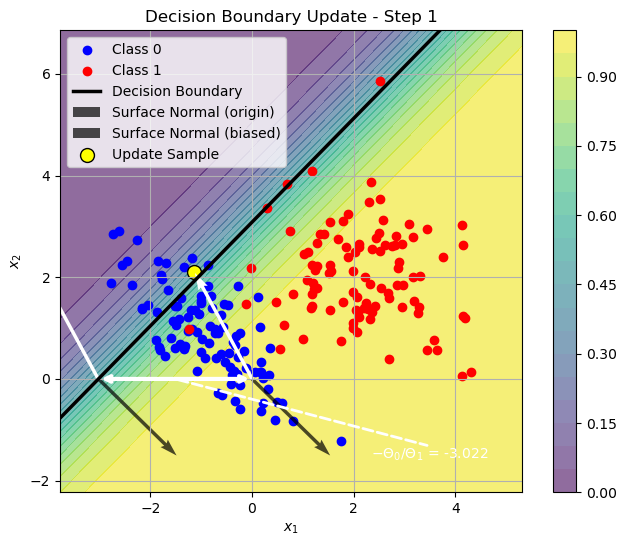

In [137]:
theta = model.update(X[0], y[0])
step += 1
plot_decision_boundary(X, y, theta, step = step, sample_index=1)


theta: [ 4.47053669  1.73532208 -1.87266298]
offset_position: [-2.57619997  0.        ]


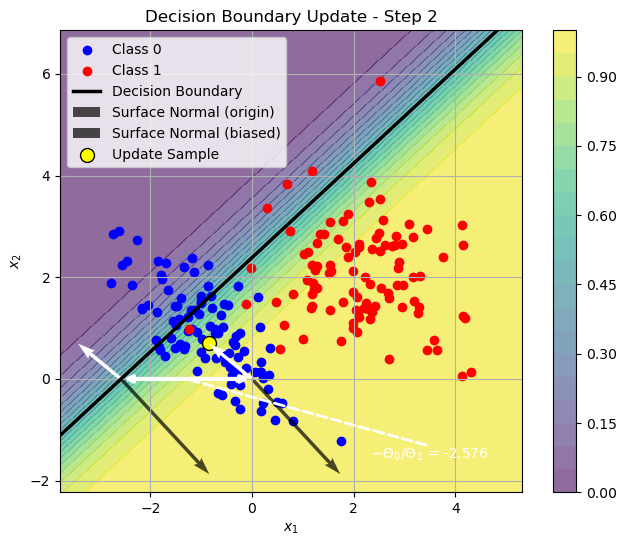

In [138]:
theta = model.update(X[1], y[1])
step += 1
plot_decision_boundary(X, y, theta, step = step, sample_index=2)
